In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# csv파일 읽어오기
titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerId : 승객식별자 (사용하지 않음)
- Survive : 생존여부(0:사망, 1:생존)  => 타겟변수
- Pclass : 객실 등급(1: 1등석, 2: 2등석 ,3: 3등석)
- Name : 승객 이름 (사용하지 않음)
- Sex	: 성별 (male female)
- Age	: 나이 (결측치 있음)
- SibSp :	같이 탑승한 형제/배우자 수
- Parch : 같이 탑승한 부모/자녀 수
- Ticket : 티켓 번호 (사용하지 않음)
- Fare : 탑승 요금
- Cabin : 객실 번호 (사용하지 않음)
- Embarked : 탑승 항구 (C=Cherbourg ,Q=Queenstown, Southampton)

In [3]:
# 결측치 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# 컬럼내 null 값 처리(fillna 함수 사용) : Age는 평균, Cabin과 Embarked는 'N'으로 대체
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print("데이터셋의 Null의 총 개수는?",titanic_df.isnull().sum().sum())


데이터셋의 Null의 총 개수는? 0


C:\Users\Playdata\AppData\Local\Temp\ipykernel_14588\2756147773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_14588\2756147773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [5]:
# 범주형 변수들 고유값 확인
print("성별의 고유값 : ", titanic_df['Sex'].value_counts())
print("객실번호의 고유값 : ", titanic_df['Cabin'].value_counts())
print("탑승위치의 고유값 : ", titanic_df['Embarked'].value_counts())

성별의 고유값 :  Sex
male      577
female    314
Name: count, dtype: int64
객실번호의 고유값 :  Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64
탑승위치의 고유값 :  Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [6]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]   # 객실번호에서 첫글자만 추출 (객실 등급/구역정보)
titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [7]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()  # 성별x생존별 생존자 수 확인

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

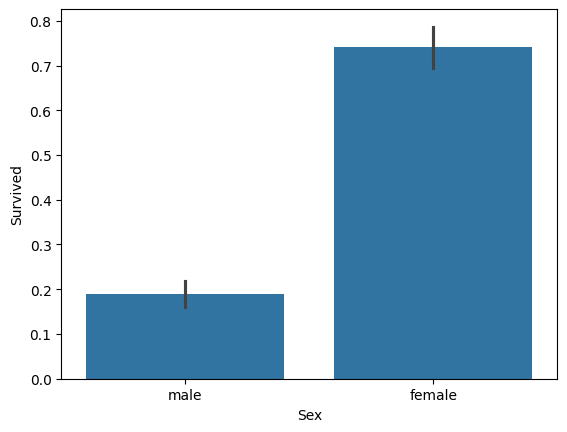

In [8]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

남성이 여성에 비해 생존하기 어려웠다

<Axes: xlabel='Pclass', ylabel='Survived'>

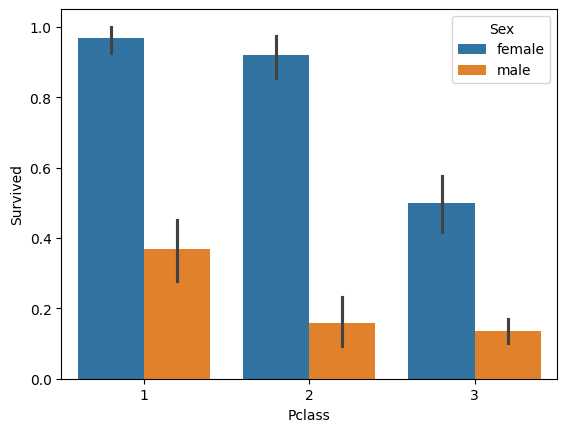

In [9]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

3등급 객실은 1등급 2등급 객실에 비해 생존하기 어려웠다.

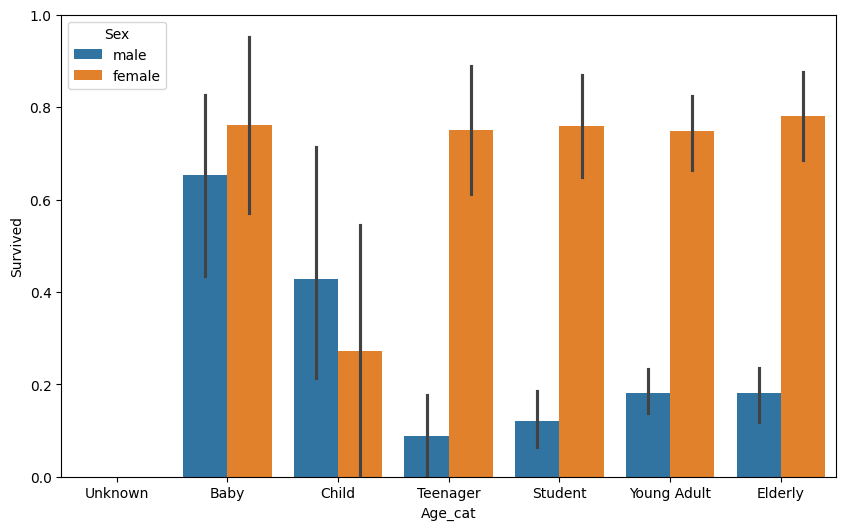

In [10]:
# 입력되는 age에 따라 구분값을 반환하는 함수. DataFrame의 apply(lambda로 사용)
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    else: cat = 'Elderly'
    return cat

plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Elderly']

# lambda식을 사용해 get_category() 함수 출력값을 새로운 파생변수 'Age_cat' 값으로 사용
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 남성의 경우 어린아이이거나 상대적으로 노인이 살아남은 경향
- 여성의 경우 Child를 제외한 전 구간에서 높은 생존률

In [11]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

# 인코딩 함수
def encode_feature(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        
        # 카테고리값이 유형에 따라 0 ~ (카테고리 유형수-1)까지의 숫자 값으로 변환
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_feature(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [12]:
# 아래에서 사용할 함수 정의

# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    
    return df

# 불필요한 feature 제거 함수
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    
    for feature in features:
        le = LabelEncoder()
        
        # 카테고리값이 유형에 따라 0 ~ (카테고리 유형수-1)까지의 숫자 값으로 변환
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

-- 전처리 함수 생성

학습 데이터와 테스트 데이터를 분리하고 모델 학습--

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_14588\3498903677.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_14588\3498903677.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [14]:
# 학습용 데이터셋과 테스트 데이터셋을 나눠준다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [15]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

712 179 712 179


In [16]:
# 모델 선정 및 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, RandomForest, 로지스틱 회귀
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')     # liblinear방식으로 분류

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier의 정확도 : ",accuracy_score(y_test, dt_pred))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier의 정확도 : ",accuracy_score(y_test, rf_pred))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression의 정확도 : ",accuracy_score(y_test, lr_pred))

DecisionTreeClassifier의 정확도 :  0.7877094972067039
RandomForestClassifier의 정확도 :  0.8547486033519553
LogisticRegression의 정확도 :  0.8659217877094972


In [17]:
# K-fold 교차검증
import numpy as np
from sklearn.model_selection import KFold

# kfold 함수
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    # K-fold 교차검증 수행
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        # X-titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 실행
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classfier 학습, 예측, 정확도 계산
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print(f"교차검증 {iter_count}의 정확도 : {accuracy}")
        
        
    # 5개 fold에서의 평균 정확도 계산
    mean_scores = np.mean(scores)
    print(f"평균 정확도 : {mean_scores:.4f}")

exec_kfold(dt_clf)

교차검증 0의 정확도 : 0.7541899441340782
교차검증 1의 정확도 : 0.7808988764044944
교차검증 2의 정확도 : 0.7865168539325843
교차검증 3의 정확도 : 0.7696629213483146
교차검증 4의 정확도 : 0.8202247191011236
평균 정확도 : 0.7823


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f"교차검증 {iter_count}의 정확도 : {accuracy:.4f}")
    
print(f"평균 정확도 : {np.mean(scores):.4f}")

교차검증 0의 정확도 : 0.7430
교차검증 1의 정확도 : 0.7753
교차검증 2의 정확도 : 0.7921
교차검증 3의 정확도 : 0.7865
교차검증 4의 정확도 : 0.8427
평균 정확도 : 0.7879


In [19]:
# GridSearchCV로 최적의 하이퍼파라미티를 찾는다.
from sklearn.model_selection import GridSearchCV

prameters = {
    "max_depth" : [2,3,5,10],       # 트리 최대 깊이
    "min_samples_split" : [2,3,5],  # 노드 분할시 최소 샘플 수
    "min_samples_leaf" : [1,5,8]    # 리프 노드에 반드시 남아야 하는 최소 샘플 수
}

grid_dclf = GridSearchCV(dt_clf, param_grid=prameters, scoring='accuracy', cv = 5)
grid_dclf.fit(X_train,y_train)

print("GridSearchCV의 최적의 하이퍼 파라미터",grid_dclf.best_params_)
print("GridSearchCV의 최고의 정확도",grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_   # 최적의 모델 저장

# 최적의 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print(f"DecisionTreeClassifier 정확도 : {accuracy:.4f}")

GridSearchCV의 최적의 하이퍼 파라미터 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV의 최고의 정확도 0.7991825076332119
DecisionTreeClassifier 정확도 : 0.8715


- Optuna로 DecisionTreeClassFier 하이퍼파라미터 최적화
    - GridSearchCV와 공통점 : 여러 파라미터 조합을 탐색
    - GridSearchCV와 차이점 : 매 train마다 파라미터를 똑똑하게 탐색/확용 추천해준다.
    - 그렇다고 성능이 좋은 건 아니다.

In [25]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score # kfold사용, CV점수 계산
from sklearn.tree import DecisionTreeClassifier # 하이퍼파라미터 튜닝할 모델(의사결정나무)
from sklearn.metrics import accuracy_score # 정확도

# optuna가 한번 trial(시도)할 때마다 하이퍼파라미터를 제안하는 범위를 지정한다.
# trial.suggest_: optuna가 값을 뽑는 함수 (GridSearchCV에서 "그리드" 역할)
def objective(trial):
    params = {
        "max_depth" : trial.suggest_int("max_depth", 2, 10),                # 트리 깊이 : 2~10 중 서택
        "min_samples_split" : trial.suggest_int("min_samples_split",2,10),  # 분기 최소 샘플 수 : 2~10 중 선택
        "min_samples_leaf" : trial.suggest_int("min_samples_leaf",1,10),    # 리프 최소 샘플 수 : 1~10 중 선택
        "random_state" : 11 # 재현성 (시드 고정)
    }
    
    model = DecisionTreeClassifier(**params)    # 모델 생성 (** (unpacking) : 딕셔너리 key=value 쌍을 펼쳐서 넣는다.) 

    # 교차검증 설정 (StratifiedFold: fold마다 클래스 비율을 유지. 불균형 데이터에 강하다)
    cv = StratifiedKFold(
        n_splits = 5,       # 5등분
        shuffle = True,     # 데이터 랜덤으로 섞음
        random_state = 11   # 섞는 방식은 고정 (재현성)
    )

    # 학습 폴드로 fit, 검증 폴드로는 predict, scoring기준으로 저무 계산. 5번 반복 후 점수 배열 반환
    scores = cross_val_score(model,X_train,y_train,cv=cv, scoring='accuracy')
    
    return scores.mean() # 평균 정확도를 반환. =>  optunaㄱ마 최대화할 값 반화(평균 정확도가 높아지는 방향으로 파라미터를 잡는다.)

# Optuna 스터디 생성 (direction='Maximize') : objective가 반환하는 값(정확도)를 최대화하도록 탐삭
study = optuna.create_study(direction='maximize')  

# 최적화 수행
study.optimize(
    objective,      # 함수 (파라키터를 업데이트하는데 참고하는 함수)
    n_trials=50     # 파라미터 조합 시도수
)       

# 탐색 결과 출력
print("Optuna 최적 하이퍼파라미터: ", study.best_params)
print(f"Optuna 교차검증 최고 정확도 : {study.best_value:.4f}")

# 최적 파라미터 적용(best_params는 딕셔너리 형태이기 때문에 unpacking)
best_optuna_df = DecisionTreeClassifier(**study.best_params, random_state=11)   
best_optuna_df.fit(X_train,y_train)

# 평가
optuna_pred = best_optuna_df.predict(X_test)        # 테스트 데이터 예측
optuna_acc = accuracy_score(y_test,optuna_pred)     # 테스트 정확도 계산
print(f"테스트셋으로 평가한 Optuna 튜닝 DecisionTreeClassifier 정확도 : {optuna_acc:.4f}")

[I 2025-12-24 11:39:47,472] A new study created in memory with name: no-name-94881d1d-842e-4a65-8eae-e45293c10493
[I 2025-12-24 11:39:47,488] Trial 0 finished with value: 0.7724120949473062 and parameters: {'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7724120949473062.
[I 2025-12-24 11:39:47,529] Trial 1 finished with value: 0.7836600019698611 and parameters: {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7836600019698611.
[I 2025-12-24 11:39:47,545] Trial 2 finished with value: 0.7681867428346301 and parameters: {'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.7836600019698611.
[I 2025-12-24 11:39:47,577] Trial 3 finished with value: 0.7850487540628385 and parameters: {'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 3 with value: 0.7850487540628385.
[I 2025-12-24 11:39:47,605] Trial 4 finished with value: 0.77665

Optuna 최적 하이퍼파라미터:  {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 8}
Optuna 교차검증 최고 정확도 : 0.7879
테스트셋으로 평가한 Optuna 튜닝 DecisionTreeClassifier 정확도 : 0.8659
